### Regional Hydrology

- The California Water Year starts in October and ends in September 
- When can you expect peak run-off (Q) in a river system that is primarily fed by snow melt (e.g. the rivers fed by snowmelt from the Sierra Nevada Mountains)?
    - May through July (late Spring, early Summer)
- Precipitation has interacted with warming temperatures. The last few decades have increased the size of the atmospheric sponge, thus tending to increase evapotranspiration from soils, from vegetation, and snow. 
- Recipe for intense rainfall in the West
    - Moisture
        - brought in from the Pacific Ocean, the Gulf of Mexico, and some preferred pathways up through the Gulf of California
    - Lift
        - when air lifts up high enough in the atmosphere so it condenses and forms the liquid that will eventually become rain
        - How?
            - Wind. Wind funneling up against the mountains
    - Instability:
        - Warm air close to the ground rises very quickly
- Rainfall intensity
    - A combination of moisture, lift, and instability
    - And a long enough duration event
- General trends
    - We expect the northwest to get a bit wetter and the southwest to get a bit drier
    - In the West: generally drier summers and generally wetter winters
    - **Note: warmer temperatures may mean that snow may start falling as rain instead**
        - **Important because snowpacks acts as a natural reservoir, releasing it when we want it**
        - **If water falls as rain, we’ll catch a lot less of it**
- Timing of water supply
    - Warmer temperatures means snow melts faster and sooner
    - **In the southwest, snowpacks have melted 1 month faster because of warmer temps**
    - Earlier snowmelt means
        - earlier peak runoff (when there is the most water in the steam)
            - this is when we try to catch water and store it for later use
        - and longer low flows in the stream
- Snow-water content
    - Definition: Snow-water content is the amount of water stored in the snowpack. It depends on both precipitation and temperature. As winter temperatures warm, more precipitation falls as rain instead of snow, resulting in less snowpack.
    - URL: https://oehha.ca.gov/epic/impacts-physical-systems/snow-water-content#:~:text=Snow%2Dwater%20content%20is%20the,snow%2C%20resulting%20in%20less%20snowpack. 
    - Notes:
        - Snowpack stores water from wintertime precipitation, releasing it as runoff in the warmer months. 
        - The state relies on water from melting snow in the Sierra Nevada to provide approximately one-third of its yearly water supply for agriculture and urban needs.
        - When snowpack levels have historically been deepest: April 1st 
        - Regional differences in snow-water content have been noted in the Sierra Nevada. Cooler air temperatures at higher elevations generally allow for more snow to accumulate.
        - Pattern: warming spring temperatures and earlier snowmelt in recent years

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so
sns.set_theme(style="white", palette="muted")

import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [2]:
# Import data

DATA_PATH = '/Users/alex791/Library/CloudStorage/OneDrive-PNNL/Documents/Projects/ML_Earth_Projects/Reservoir_Project/Data'

In [3]:
basin_inflow = pd.read_excel(f'{DATA_PATH}/Custom/basin_inflow.xlsx', index_col=0)

In [4]:
basin_inflow.head()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
OBS DATE,,,,,,,,,,,,,,,,,,,,,
2008-01-01,27.666,9.52,0.00,44,58,34,20.24,0.00,38,7.67,...,30,7.90,44,55,37,7.72,0.04,40,61,30
2008-01-02,30.044,9.52,0.00,47,57,39,20.36,0.12,38,7.79,...,30,7.88,38,46,32,7.76,0.04,39,63,29
2008-01-03,48.478,9.76,0.24,45,50,38,20.36,0.00,39,7.79,...,30,7.86,30,35,25,7.76,0.00,40,53,29
2008-01-04,90.246,11.28,1.52,46,50,42,25.76,5.40,45,8.15,...,33,8.27,31,33,28,11.00,3.24,39,47,32
2008-01-05,200.200,11.96,0.68,41,46,37,27.44,1.68,58,11.75,...,33,8.27,31,33,28,12.04,1.04,33,38,32


In [6]:
basin_inflow.columns 

Index(['INFLOW', 'ADR_PRECIP_ACC', 'ADR_PRECIP_INCR', 'ADR_TEMP_AVG',
       'ADR_TEMP_MAX', 'ADR_TEMP_MIN', 'HYS_PRECIP_ACC', 'HYS_PRECIP_INCR',
       'HYS_SNOW_DEPTH', 'HYS_SNOW_WATER_CONTENT', 'HYS_TEMP_AVG',
       'HYS_TEMP_MAX', 'HYS_TEMP_MIN', 'DUN_PRECIP_ACC', 'DUN_WIND_GUST',
       'DUN_WIND_SPEED', 'DUN_TEMP_AVG', 'DUN_TEMP_MAX', 'DUN_TEMP_MIN',
       'SGP_PRECIP_ACC', 'SGP_PRECIP_INCR', 'SGP_TEMP_AVG', 'SGP_TEMP_MAX',
       'SGP_TEMP_MIN', 'FRN_PRECIP_ACC', 'FRN_PRECIP_INCR', 'FRN_SNOW_DEPTH',
       'FRN_SNOW_WATER_CONTENT', 'FRN_TEMP_AVG', 'FRN_TEMP_MAX',
       'FRN_TEMP_MIN', 'PFH_PRECIP_ACC', 'PFH_PRECIP_INCR', 'PFH_TEMP_AVG',
       'PFH_TEMP_MAX', 'PFH_TEMP_MIN'],
      dtype='object')

### Analysis

In [7]:
# Utility functions

def handle_missing(df):
  # forward fill missing values
  df.ffill(axis=0, inplace=True)

# Seasonal data is differenced by substracting an observation from the same time in the previous cycle
def difference(dataset, interval=1):
    cols = []
    for col in dataset.columns: 
        col_data = dataset[col]
        series = col_data.values
        diff = list()
        for i in range(interval, len(series)):
            value = series[i] - series[i - interval]
            diff.append(value)
        cols.append(pd.Series(diff))
    
    return pd.concat(cols, axis=1)

'\ndef make_stationary(series):\n    # transform the series\n    df_log=np.sqrt(series)\n    \n    # shift the transformation by one\n    # then find the difference between the transformed data and the shift\n    diff_data = df_log.diff()\n    \n    # fill back to handle shift\n    diff_data.bfill(axis=0, inplace=True)\n    \n    return diff_data\n'

In [64]:
# Summary statistics 

basin_inflow.describe()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,...,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,101.714391,20.923865,0.091182,61.257724,73.851643,51.001962,53.753085,0.246896,27.433055,8.190920,...,34.148112,11.142903,45.063512,54.541197,37.917607,31.849402,0.142065,53.956106,71.763610,40.485042
std,171.229725,13.522791,0.320736,13.516949,17.037502,11.032340,37.785032,0.653448,39.577624,13.433769,...,49.332494,16.001879,13.865843,15.448083,13.181329,23.716505,0.464197,13.620430,17.375523,10.026854
min,5.210000,0.000000,0.000000,31.000000,36.000000,2.000000,0.000000,0.000000,-2.000000,-0.730000,...,-81.000000,-3.090000,11.000000,17.000000,2.000000,0.000000,0.000000,21.000000,33.000000,11.000000
25%,31.290000,9.840000,0.000000,50.000000,59.000000,42.000000,26.080000,0.000000,1.000000,-0.120000,...,2.000000,0.610000,35.000000,43.000000,29.000000,13.930000,0.000000,43.000000,58.000000,32.000000
50%,50.475000,21.480000,0.000000,60.000000,73.000000,50.000000,51.600000,0.000000,5.000000,0.480000,...,6.000000,2.630000,44.000000,54.000000,36.000000,29.440000,0.000000,52.000000,72.000000,39.500000
75%,106.209500,27.590000,0.000000,73.000000,89.000000,60.000000,70.320000,0.120000,44.000000,11.510000,...,57.000000,19.325000,57.000000,68.000000,49.000000,43.520000,0.040000,67.000000,87.000000,49.000000
max,3189.633000,53.920000,4.680000,92.000000,110.000000,80.000000,158.600000,9.040000,160.000000,57.230000,...,185.000000,70.140000,75.000000,87.000000,68.000000,97.520000,5.760000,84.000000,108.000000,68.000000


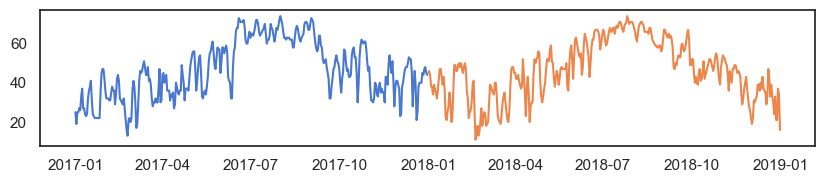

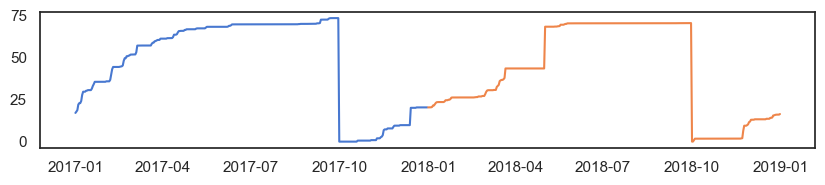

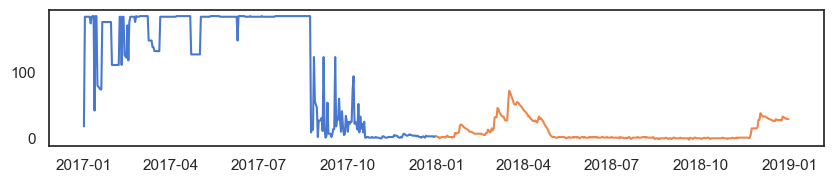

In [62]:
# Visualizing seasonality

# Temperature
FRN_TEMP_AVG_DATES = basin_inflow['FRN_TEMP_AVG']
FRN_TEMP_AVG_2017 = FRN_TEMP_AVG_DATES['2017':'2018'].groupby(pd.Grouper(freq='1Y'))

# Precipitation
FRN_PRECIP_ACC_DATES = basin_inflow['FRN_PRECIP_ACC']
FRN_PRECIP_ACC_2017 = FRN_PRECIP_ACC_DATES['2017':'2018'].groupby(pd.Grouper(freq='1Y'))

# Snow depth
FRN_SNOW_DEPTH_DATES = basin_inflow['FRN_SNOW_DEPTH']
FRN_SNOW_DEPTH_2017 = FRN_SNOW_DEPTH_DATES['2017':'2018'].groupby(pd.Grouper(freq='1Y'))

def plot_group(groups):
    i = 1
    plt.figure(figsize=(10, 6))
    
    for name, group in groups:
        plt.subplot((n_groups*100) + 10 + 1)
        i += 1
        plt.plot(group)
    plt.show()
 

plot_group(FRN_TEMP_AVG_2017)
plot_group(FRN_PRECIP_ACC_2017) 
plot_group(FRN_SNOW_DEPTH_2017)

In [13]:
# Example of removing seasonality

# interval for differencing data
days = 365

basin_idx = basin_inflow.reset_index(names=['OBS DATE'])

all_dun_precip_acc = basin_idx.loc[:, ['DUN_PRECIP_ACC']] 

all_dun_precip_acc_COPY = all_dun_precip_acc.copy()

all_dun_precip_acc_COPY.head()

,DUN_PRECIP_ACC
0,6.120
1,6.120
2,6.120
3,6.307
4,6.307


In [10]:
stationary_data = difference(all_dun_precip_acc_COPY, days)
stationary_data.index = all_dun_precip_acc_COPY.index[days:]
stationary_data.columns = ['DUN_PRECIP_ACC']
print("Null/NaN count: ", stationary_data.isnull().sum().sum())

Null/NaN count:  0


In [11]:
"""
Stationary check

If the test statistic is smaller than the critical value at 1%, we can reject the null hypothesis 
with a significance level of less than 1%. Rejecting the null hypothesis means the process has no unit root,
and the time series is stationary or does not have a time-dependent structure.
"""

result = adfuller(stationary_data)

print("ADF : ",result[0])
print("P-Value : ", result[1])
print("Num Of Lags (seasonality of x number of months): ", result[2])
print("Num Of Observations Used For ADF Regression and Critical Values Calculation :", result[3])
print("Critical Values :")
for key, val in result[4].items():
 print("\t",key, ": ", val) 

ADF :  -3.9665995967237992
P-Value :  0.0015958660853943574
Num Of Lags (seasonality of x number of months):  3
Num Of Observations Used For ADF Regression and Critical Values Calculation : 3709
Critical Values :
	 1% :  -3.432114311545516
	 5% :  -2.862319575211155
	 10% :  -2.567184979063627


In [12]:
# A California Water Year starts in October and ends in September 

INFLOW_WATER_YEAR_2016_2018_DATES = basin_inflow.loc['2016-10-01':'2018-09-30']
INFLOW_WATER_YEAR_2016_2018 = INFLOW_WATER_YEAR_2016_2018_DATES.reset_index(names=['OBS DATE'])
INFLOW_WATER_YEAR_2016_2018.head()

,OBS DATE,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
0,2016-10-01,29.393,0.0,0.0,60,76,47,0.00,0.00,0,...,0,0.5,44,60,33,0.00,0.00,52,77,36
1,2016-10-02,43.183,0.0,0.0,55,66,48,0.00,0.00,0,...,0,0.5,44,60,33,0.12,0.12,45,64,31
2,2016-10-03,29.534,0.0,0.0,53,60,45,0.12,0.12,0,...,0,0.5,44,60,33,0.16,0.04,44,51,35
3,2016-10-04,32.819,0.0,0.0,58,72,47,0.24,0.12,1,...,0,0.5,44,60,33,0.20,0.04,49,70,36
4,2016-10-05,18.264,0.0,0.0,59,75,47,0.24,0.00,0,...,0,0.5,44,60,33,0.20,0.00,47,73,33


In [14]:
# CA water year: ['2016-10-01':'2018-09-30'] 

# interval for differencing data
days = 365

ADR_PRECIP_ACC_TEMP_MAX_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'ADR_PRECIP_ACC', 'ADR_TEMP_MAX']] 

# difference data 

ADR_PRECIP_ACC_TEMP_MAX = ADR_PRECIP_ACC_TEMP_MAX_WY_2016_2018.copy()
stationary_ADR_PRECIP_ACC_TEMP_MAX = difference(ADR_PRECIP_ACC_TEMP_MAX, days)
stationary_ADR_PRECIP_ACC_TEMP_MAX.index = ADR_PRECIP_ACC_TEMP_MAX.index[days:]
stationary_ADR_PRECIP_ACC_TEMP_MAX.columns = ['ADR_PRECIP_ACC', 'ADR_TEMP_MAX']
handle_missing(stationary_ADR_PRECIP_ACC_TEMP_MAX)
print("Null/NaN count: ", stationary_ADR_PRECIP_ACC_TEMP_MAX.isnull().sum().sum())

Null/NaN count:  0


In [15]:
"""
Stationary check

If the test statistic is smaller than the critical value at 1%, we can reject the null hypothesis 
with a significance level of less than 1%. Rejecting the null hypothesis means the process has no unit root,
and the time series is stationary or does not have a time-dependent structure.
"""

# ADR
result = adfuller(stationary_ADR_PRECIP_ACC_TEMP_MAX["ADR_TEMP_MAX"])

print("ADF : ",result[0])
print("P-Value : ", result[1])
print("Num Of Lags (seasonality of x number of months): ", result[2])
print("Num Of Observations Used For ADF Regression and Critical Values Calculation :", result[3])
print("Critical Values :")
for key, val in result[4].items():
 print("\t",key, ": ", val) 

ADF :  -3.572167541044768
P-Value :  0.006315968108646034
Num Of Lags (seasonality of x number of months):  13
Num Of Observations Used For ADF Regression and Critical Values Calculation : 369
Critical Values :
	 1% :  -3.448196541708585
	 5% :  -2.869404683789669
	 10% :  -2.5709597356805545


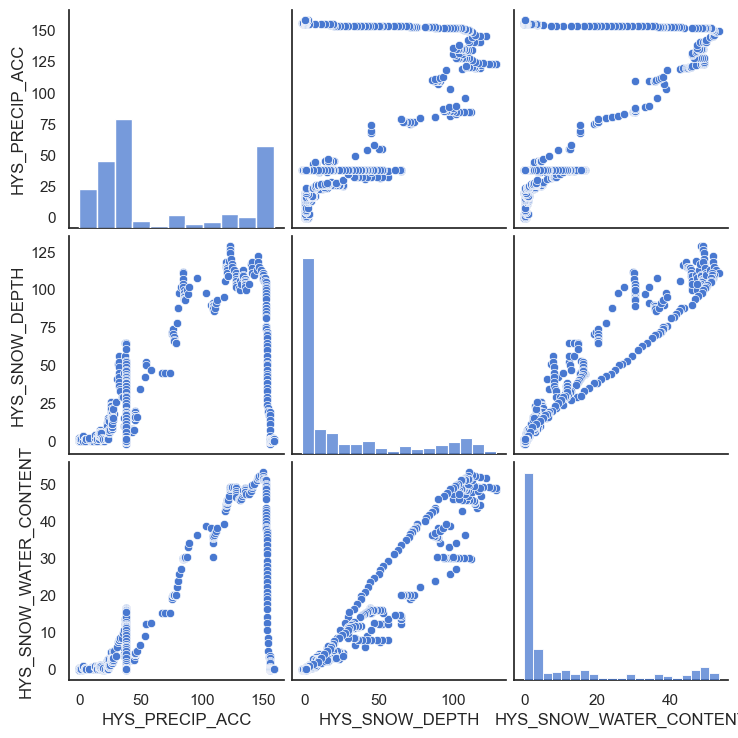

In [16]:
# Pair plot with differenced data

HYS_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'HYS_PRECIP_ACC', 'HYS_SNOW_DEPTH', 'HYS_SNOW_WATER_CONTENT']] 

HYS_2016_2018_DIFF = HYS_2016_2018.copy()
stationary_HYS_2016_2018_DIFF = difference(HYS_2016_2018_DIFF, days)
stationary_HYS_2016_2018_DIFF.index = HYS_2016_2018_DIFF.index[days:]
stationary_HYS_2016_2018_DIFF.columns = ['HYS_PRECIP_ACC', 'HYS_SNOW_DEPTH', 'HYS_SNOW_WATER_CONTENT']
handle_missing(HYS_2016_2018_DIFF)

sns.pairplot(HYS_2016_2018_DIFF)

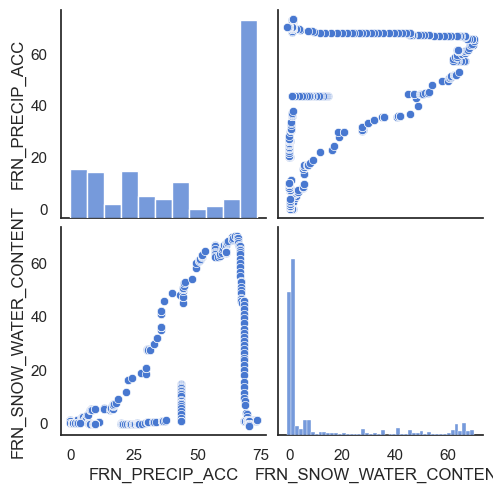

In [17]:
FRN_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'FRN_PRECIP_ACC', 'FRN_SNOW_WATER_CONTENT']] 

sns.pairplot(FRN_2016_2018)

In [18]:
"""
Water Year 2017: Oct 2017 - September 2018 
"""

INFLOW_WY_2017 = basin_inflow.loc['2017-10-01':'2018-09-30']

INFLOW_DATES_2017 = INFLOW_WY_2017.copy()
INFLOW_DATES_2017['Date'] = INFLOW_DATES_2017.index.values
INFLOW_DATES_2017['Month'] = INFLOW_DATES_2017['Date'].map(lambda time: pd.Timestamp(time).month)
season_by_month = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
INFLOW_DATES_2017['Season'] = INFLOW_DATES_2017['Month'].map(lambda month: season_by_month[month])

INFLOW_DATES_2017.head()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN,Date,Month,Season
OBS DATE,,,,,,,,,,,,,,,,,,,,,
2017-10-01,39.785,0.0,0.0,65,79,54,0.0,0.0,1,0.0,...,61,38,0.0,0.0,55,78,42,2017-10-01,10,Autumn
2017-10-02,34.943,0.0,0.0,63,75,52,0.0,0.0,1,0.0,...,54,32,0.0,0.0,53,72,38,2017-10-02,10,Autumn
2017-10-03,23.758,0.0,0.0,62,77,50,0.0,0.0,1,0.0,...,43,32,0.0,0.0,47,66,35,2017-10-03,10,Autumn
2017-10-04,22.710,0.0,0.0,63,78,51,0.0,0.0,1,0.0,...,54,32,0.0,0.0,50,75,34,2017-10-04,10,Autumn
2017-10-05,16.650,0.0,0.0,64,80,50,0.0,0.0,1,0.0,...,59,37,0.0,0.0,53,81,36,2017-10-05,10,Autumn


In [19]:
"""
Forni Ridge (elevation 7,600') Snowpack Depth Water Year 2017
"""

FRN_SNOW_DEPTH_2017 = INFLOW_DATES_2017.loc[:, ['FRN_SNOW_DEPTH', 'Month']]
FRN_SD_MONTHLY_2017 = FRN_SNOW_DEPTH_2017.copy().groupby(by="Month").mean()
FRN_SD_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

FRN_SD_MONTHLY_2017

,FRN_SNOW_DEPTH,MONTH
Month,,
1,6.580645,JAN
2,8.964286,FEB
3,45.594595,MAR
4,25.566667,APR
5,1.451613,MAY
6,1.366667,JUN
7,0.903226,JUL
8,0.483871,AUG
9,0.066667,SEP


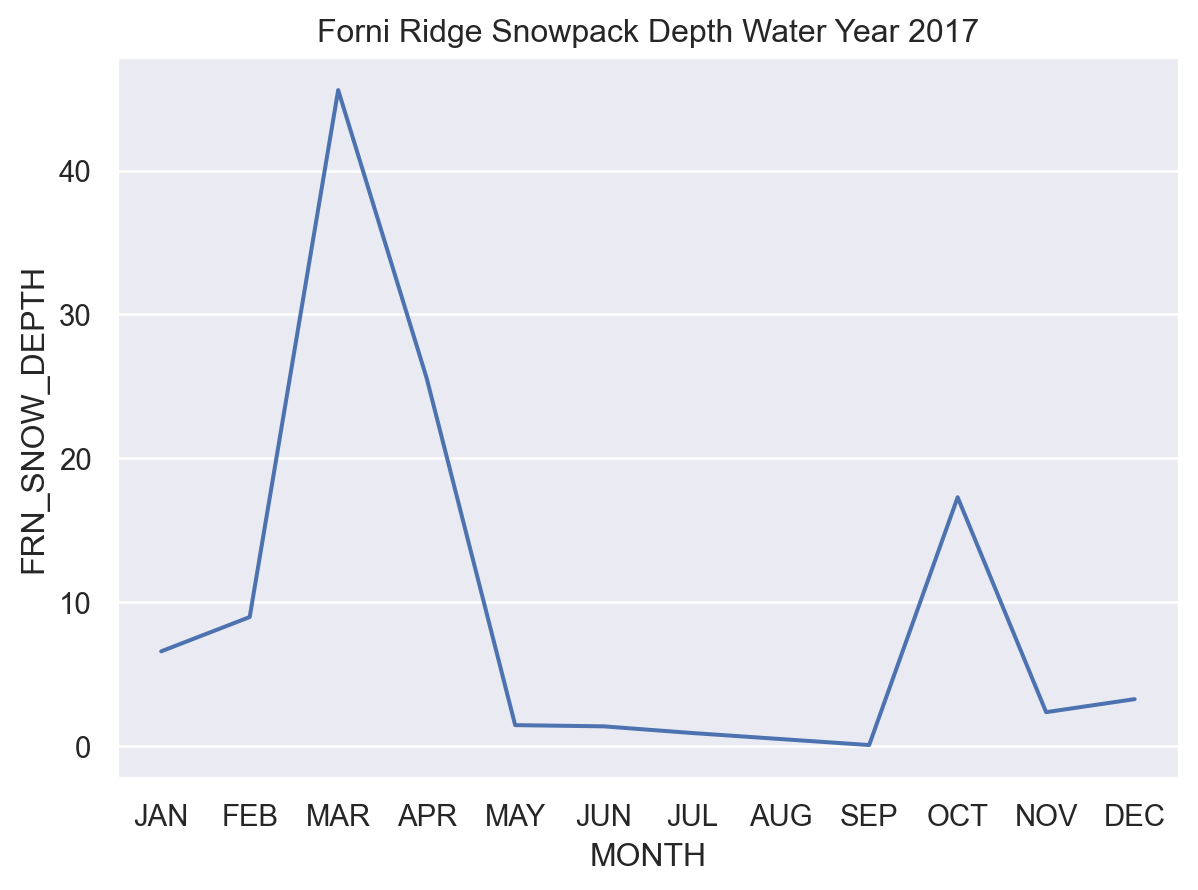

In [20]:
"""
- The graph shows snowpack peak is about 30 days earlier than historical data (April 1st).
- This corresponds with what we know about the shift in the timing of the water supply due to climate change.
- In the West, snowpacks have melted about 1 month faster because of warmer temperatures. 
- Additionally, warmer temperatures may mean that snow may start falling as rain instead, 
  resulting in smaller natural reservoirs (snowpacks) and lower flows in the late summer months.
"""

(
    so.Plot(FRN_SD_MONTHLY_2017, x="MONTH", y="FRN_SNOW_DEPTH")
    .add(so.Line())
    .label(title="Forni Ridge Snowpack Depth Water Year 2017")
)

In [21]:
"""
Huysink (elevation 6,600') Snowpack Depth Water Year 2017
"""

HYS_SNOW_DEPTH_2017 = INFLOW_DATES_2017.loc[:, ['HYS_SNOW_DEPTH', 'Month']]
HYS_SD_MONTHLY_2017 = HYS_SNOW_DEPTH_2017.copy().groupby(by="Month").mean()
HYS_SD_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

HYS_SD_MONTHLY_2017

,HYS_SNOW_DEPTH,MONTH
Month,,
1,6.548387,JAN
2,11.785714,FEB
3,47.378378,MAR
4,31.133333,APR
5,3.580645,MAY
6,0.200000,JUN
7,-0.032258,JUL
8,0.032258,AUG
9,0.666667,SEP


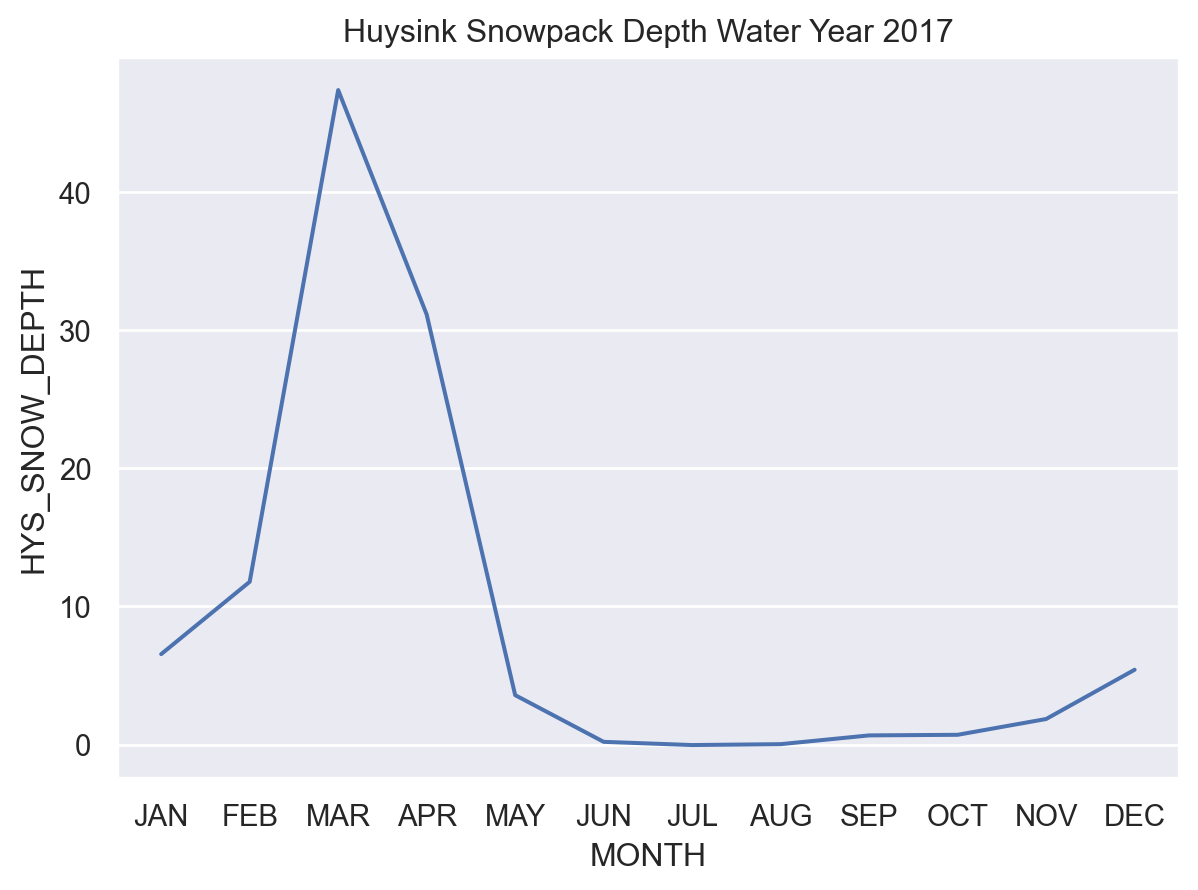

In [22]:
# Huysink snowpack record is consistent with the pattern observed at Forni Ridge at 1,000 feet lower elevation

(
    so.Plot(HYS_SD_MONTHLY_2017, x="MONTH", y="HYS_SNOW_DEPTH")
    .add(so.Line())
    .label(title="Huysink Snowpack Depth Water Year 2017")
)

In [25]:
SNOW_WATER_CONTENT_2017 = INFLOW_DATES_2017.loc[:, ['HYS_SNOW_WATER_CONTENT', 'FRN_SNOW_WATER_CONTENT', 'Season']]

hys_swc = SNOW_WATER_CONTENT_2017['HYS_SNOW_WATER_CONTENT'].to_numpy()
hys_swc_loc = len(SNOW_WATER_CONTENT_2017['HYS_SNOW_WATER_CONTENT'].values) * ['Huysink']
hys_seasons = SNOW_WATER_CONTENT_2017['Season'].to_numpy()

frn_swc = SNOW_WATER_CONTENT_2017['FRN_SNOW_WATER_CONTENT'].to_numpy()
frn_swc_loc = len(SNOW_WATER_CONTENT_2017['FRN_SNOW_WATER_CONTENT'].values) * ['Forni Ridge']
frn_seasons = SNOW_WATER_CONTENT_2017['Season'].to_numpy()

swc_locations = hys_swc_loc + frn_swc_loc
swc_values = np.concatenate((hys_swc, frn_swc))
swc_seasons = np.concatenate((hys_seasons, frn_seasons))

regional_swc = {'Location': swc_locations, 'Snow Water Content': swc_values, 'Season': swc_seasons}

REGIONAL_SNOW_WATER_CONTENT_2017 = pd.DataFrame(data=regional_swc)

REGIONAL_SNOW_WATER_CONTENT_2017.head()

,Location,Snow Water Content,Season
0,Huysink,0.0,Autumn
1,Huysink,0.0,Autumn
2,Huysink,0.0,Autumn
3,Huysink,0.0,Autumn
4,Huysink,0.0,Autumn


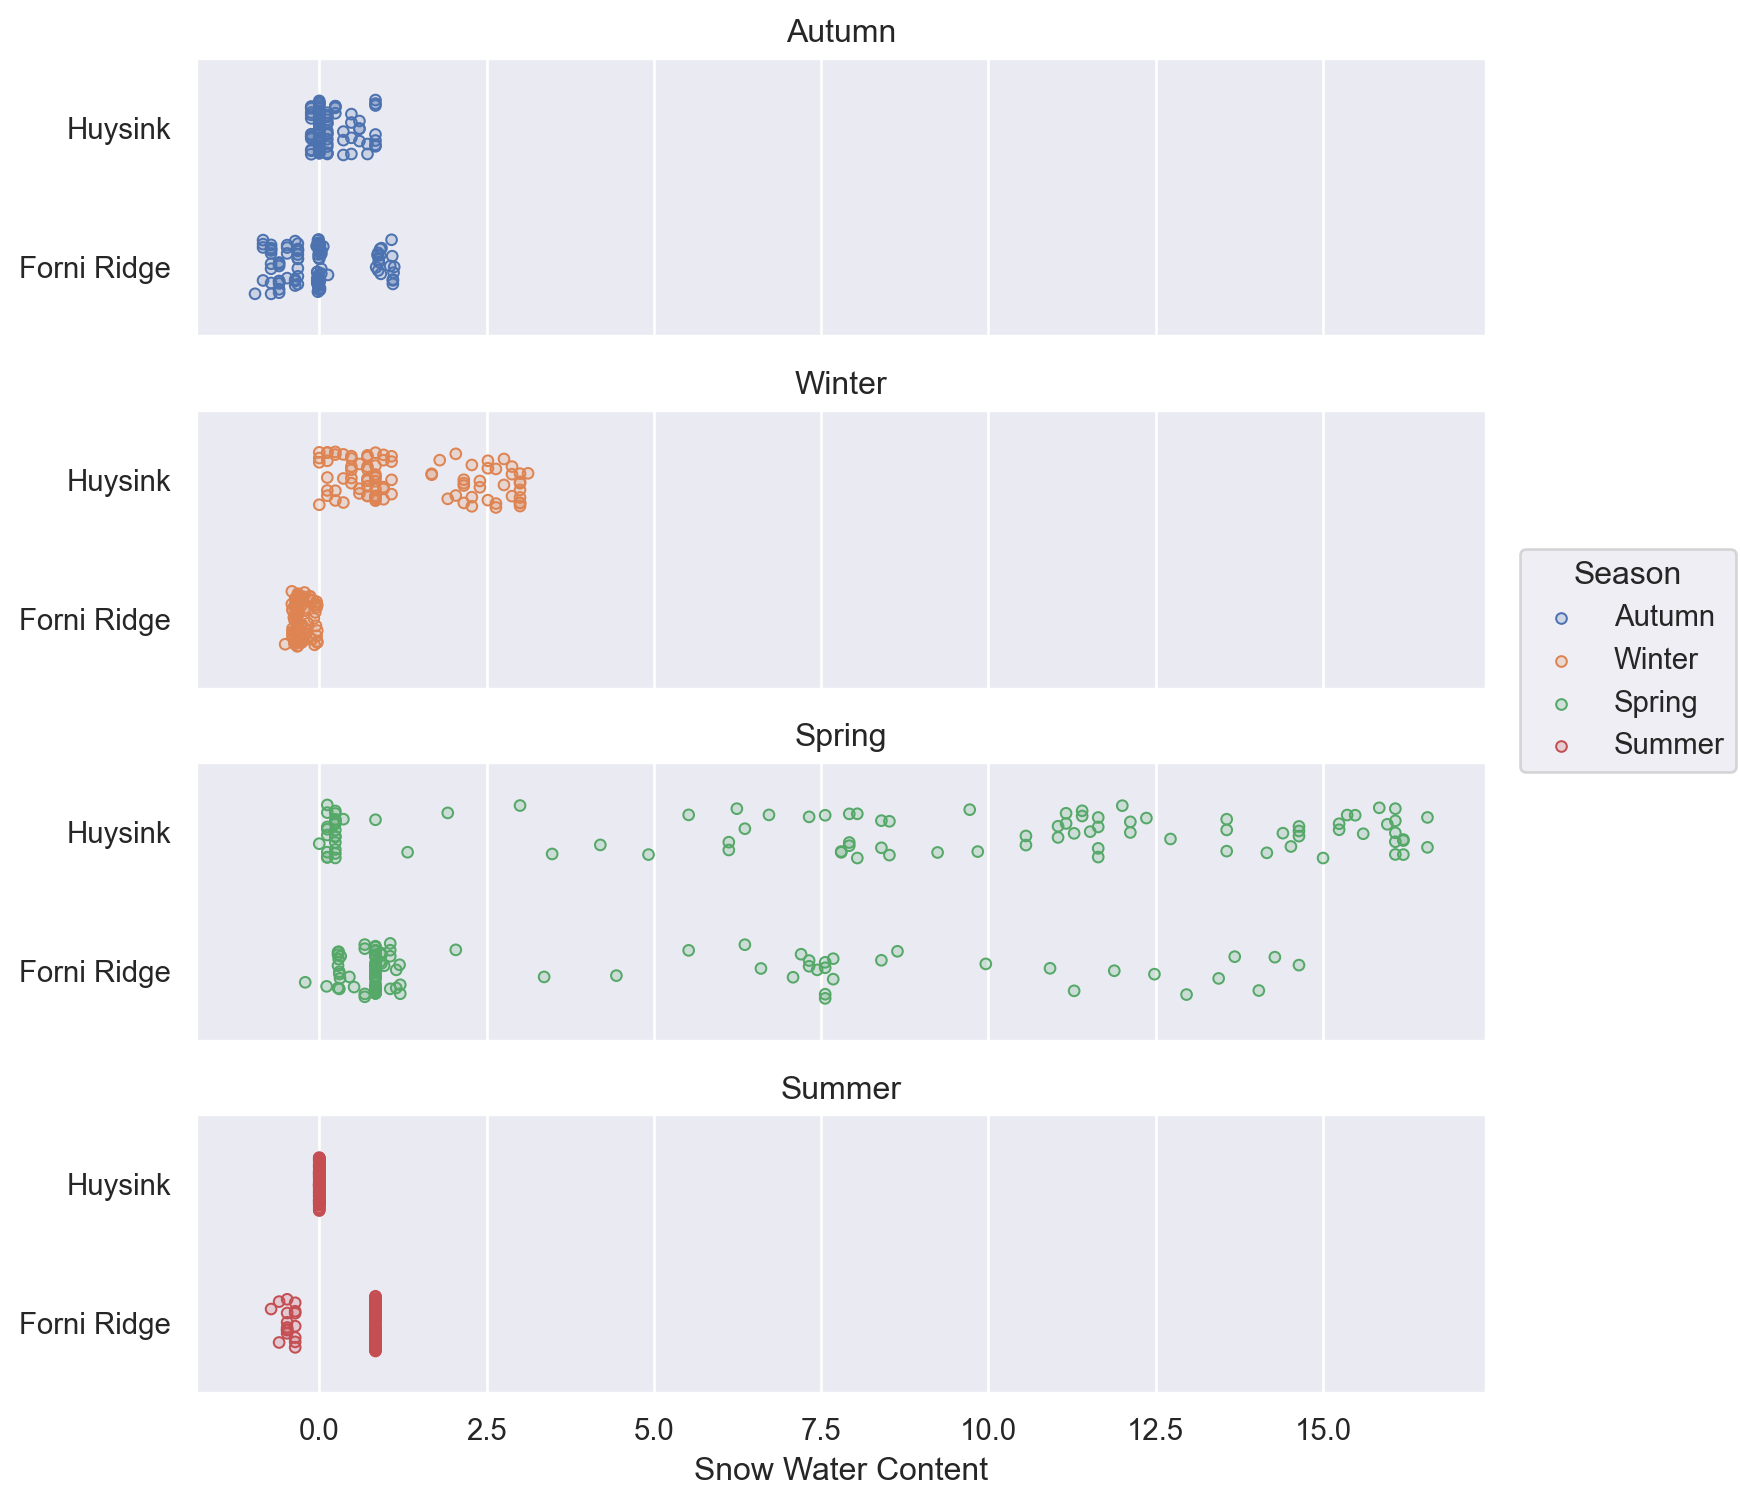

In [26]:
"""
Regional differences in snow-water content have been noted in the Sierra Nevada. 
Cooler air temperatures at higher elevations generally allow for more snow to accumulate. 

However, although Huysink is at an elevation 1000' lower than Forni Ridge, the location maintains 
about 2" more snow water content in the Spring. 
"""


(
    so.Plot(REGIONAL_SNOW_WATER_CONTENT_2017, x="Snow Water Content", y="Location", color="Season")
    .facet(row="Season")
    .layout(size=(8, 8))
    .add(so.Dots(pointsize=4), so.Jitter(.5))
    .label(
        x="Snow Water Content", y=""
    )
)

#### Storage and water balance

Water managers account for all of the water in a given watershed using the hydrological partitioning or water balance equation. The equation represents where all the water in a watershed goes and where all of it came from. 

Equation: P = Q + ET + 𐤃S

Precipitation is equal to the amount of runoff (Q) plus the amount of evapotranspiration (ET) plus the change in storage. Storage refers to fresh water storage in ice, snow, groundwater, and reservoirs.

Thus, we can assert that the change in storage across a watershed is equal to precipitation minus runoff minus evapotranspiration. 

𐤃S = P - Q - ET

#### Moisture islands

When evaluating future reservoir storage, it is crucial to look at the areas with the highest precipitation and lowest evapotranspiration (evaporation from soil and transpiration from plants). Of course, runoff either percolates into an aquifer or into rivers and streams, but the analysis will not attend to runoff as the scope of the data utilized for the model is specifically focused on weather.

Mountains are referred to as moisture islands, because in higher elevations we expect to see greater precipitation since mountains act as barries to incoming weather systems, forcing the air including the moisture to be lifted over these barriers so that the moisture condenses and falls as precipitation, building snowpacks.

The watershed has a snowmelt dominated hydrology given that the mountains experience high precipitation and low evapotranspiration producing almost all of the runoff.

In [ ]:
# this section will be for precipitation across watershed 

In [ ]:
# must create an excel sheet for data cleaning that has no dates. index only will use for training. 

# OBS DATE retained only for analysis. Numbered index used for training dataset and row manipulation below. 

# basin_inflow.reset_index(names=['OBS DATE'], inplace=True)
# basin_inflow.head()